<a href="https://colab.research.google.com/github/smiley2911/Monte-Carlo-Simulation/blob/main/Monte_Carlo_Simulation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff
from pandas_datareader import data
from scipy import stats
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import FixedFormatter, FixedLocator

In [ ]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 853.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet

In [ ]:
pip install pystan

  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.8 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.2-py3-none-any.whl (49 kB)
  Using cached webargs-8.4.0-py3-none-any.whl (31 kB)


In [ ]:
prices_train = pd.read_csv("/content/Zinc_data.csv")
cm = sns.light_palette("orange", as_cmap=True)
prices_train.head(30).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,130.640625,130.796875,130.390625,130.656250,130.656250,1479047
1,2021-11-02,130.734375,131.140625,130.640625,130.968750,130.968750,1502792
2,2021-11-03,130.921875,131.171875,130.484375,130.765625,130.765625,1821995
3,2021-11-04,130.593750,131.437500,130.562500,131.312500,131.312500,1713598
4,2021-11-05,131.218750,131.953125,131.046875,131.828125,131.828125,2046414
5,2021-11-08,131.718750,131.796875,131.250000,131.296875,131.296875,1179373
6,2021-11-09,131.343750,131.921875,131.328125,131.843750,131.843750,1633463
7,2021-11-10,131.750000,131.781250,130.562500,130.734375,130.734375,2295387
8,2021-11-11,130.734375,130.812500,130.281250,130.328125,130.328125,525839
9,2021-11-12,130.359375,130.812500,130.312500,130.531250,130.531250,1363018


In [ ]:
pd.DataFrame(prices_train.columns, columns=["name"])

,name
0,Date
1,Open
2,High
3,Low
4,Close
5,Adj Close
6,Volume


In [ ]:
fig = px.bar(prices_train, x='Date', y='Volume')
fig.update_layout(title=f'Zinc stock price', barmode='stack', font_color="black")
fig.show()

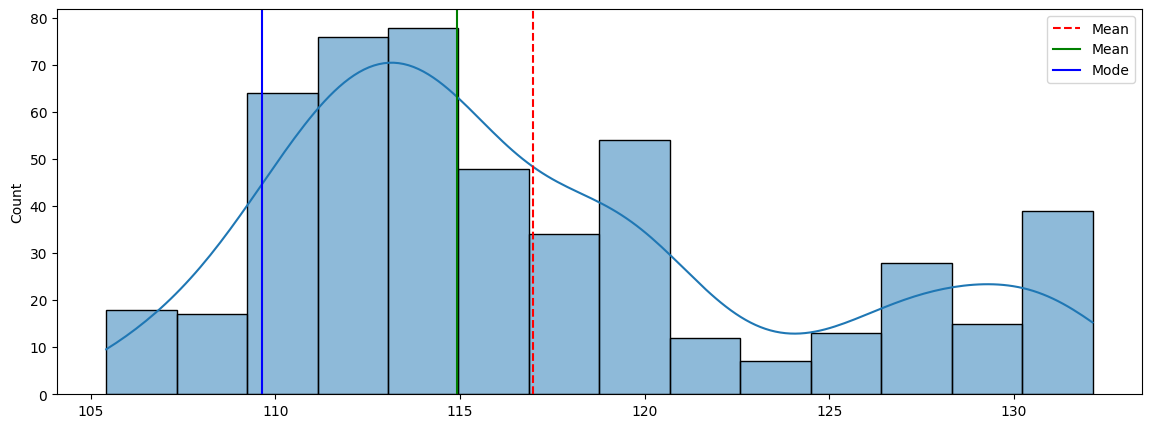

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
v_dist_1 = prices_train["Close"].values
sns.histplot(v_dist_1, ax=ax1, kde=True)
mean=prices_train["Close"].mean()
median=prices_train["Close"].median()
mode=prices_train["Close"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

In [ ]:
days_prev_len = 20

prices_train_copy = prices_train["Close"]
print(f"Before: {len(prices_train_copy)}")

prices_train_copy = prices_train_copy[0: len(prices_train_copy) - days_prev_len]
prices_test_copy = prices_train_copy[len(prices_train_copy) - days_prev_len:]
print(f"After: {len(prices_train_copy)}")
print(f"Test dt: {len(prices_test_copy)}")

Before: 503
After: 483
Test dt: 20


In [ ]:
prices_train_copy = np.log(1 + prices_train_copy.pct_change())
prices_train_copy.fillna(0, inplace=True)
prices_train_copy

0      0.000000
1      0.002389
2     -0.001552
3      0.004173
4      0.003919
         ...   
478   -0.004926
479    0.002611
480    0.001881
481   -0.006819
482   -0.006426
Name: Close, Length: 483, dtype: float64

In [ ]:
drift = prices_train_copy.mean() - (0.5 * prices_train_copy.var())
print(f"Drift: {drift}")

Drift: -0.00043235844626960226


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



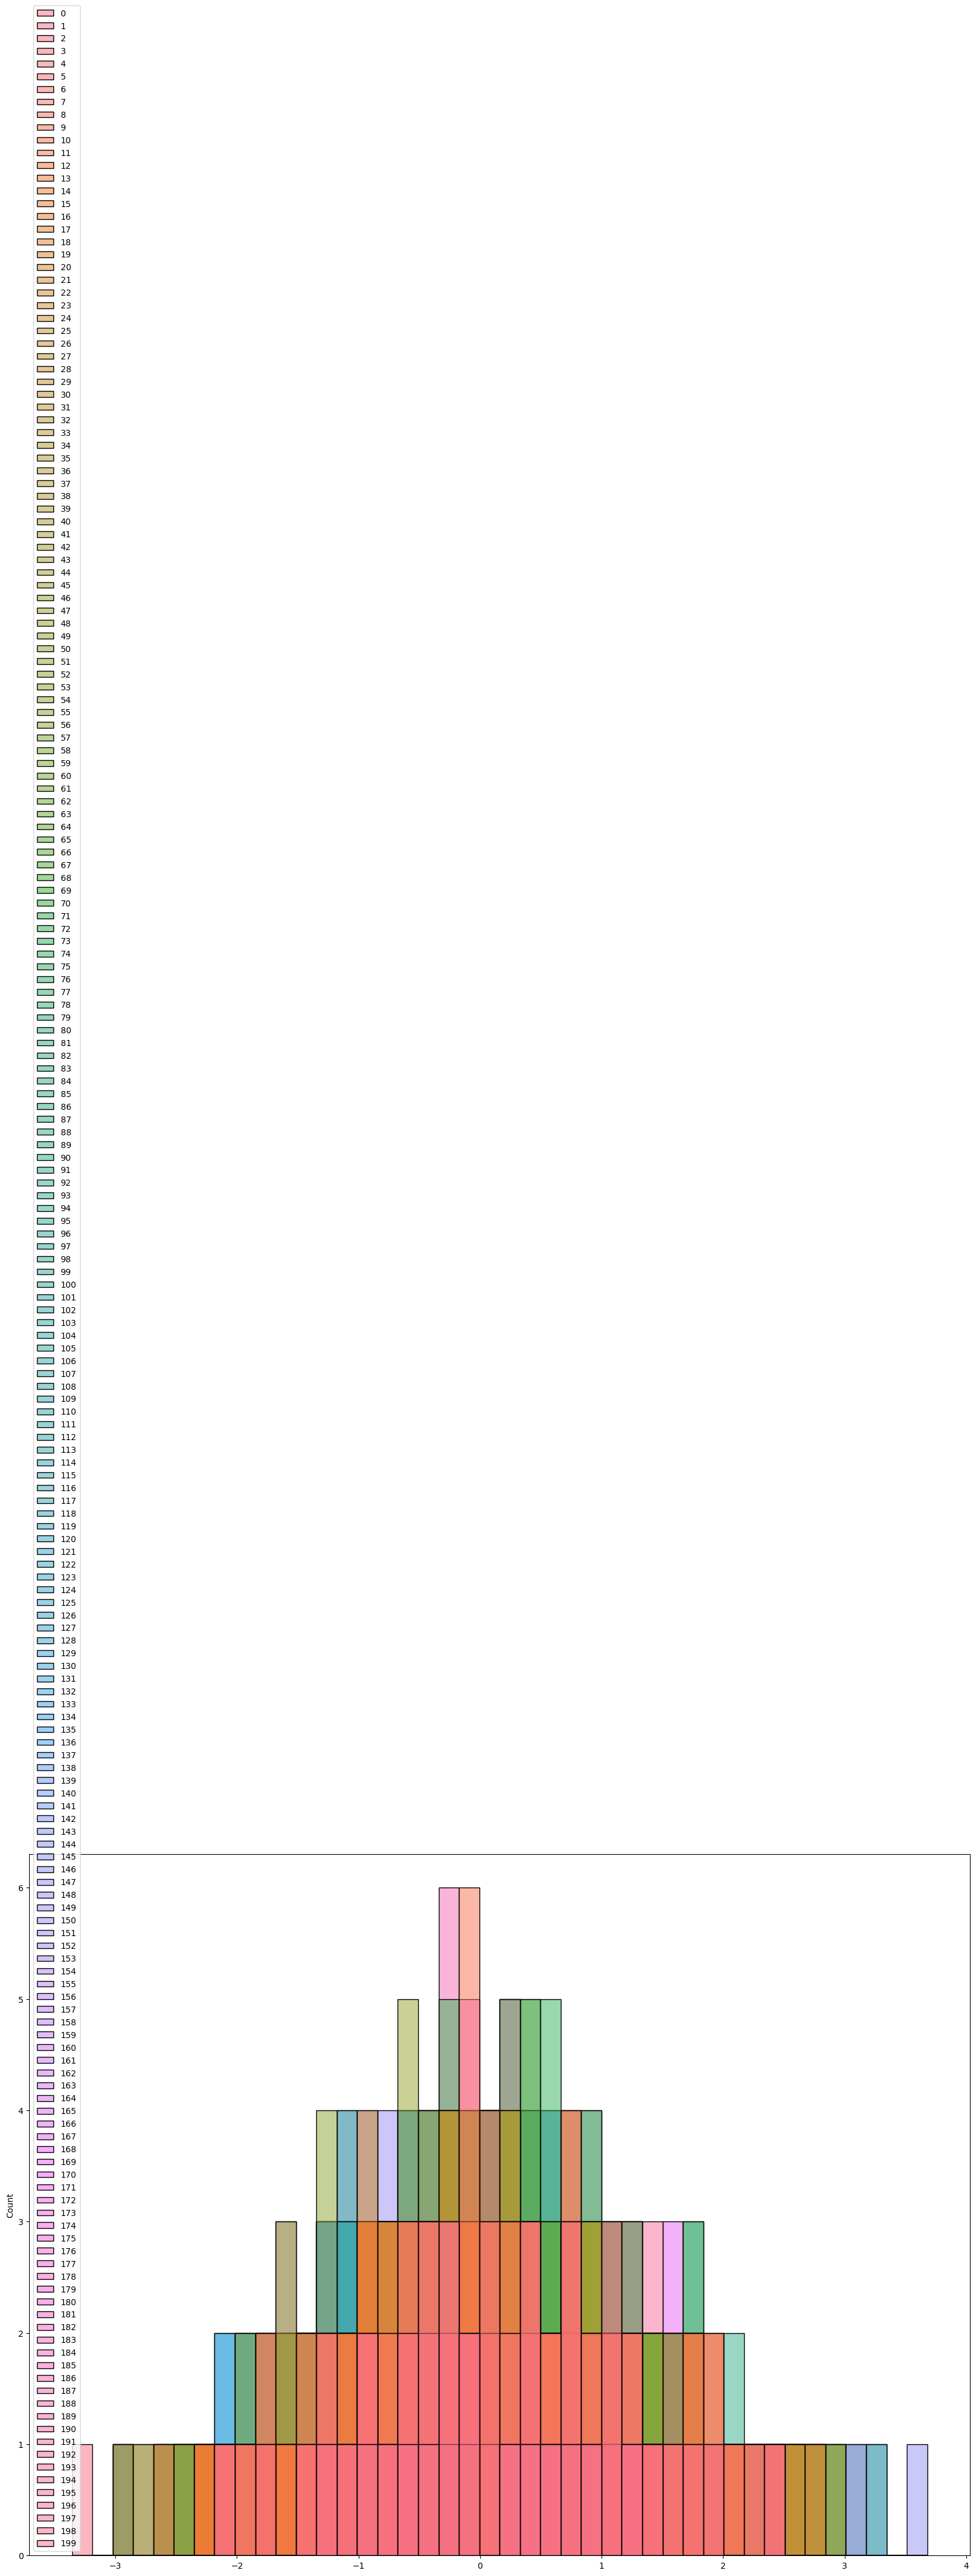

In [ ]:
simulations = 200
Z = stats.norm.ppf(np.random.rand(days_prev_len, simulations))

plt.figure(figsize=(20, 15))
sns.histplot(Z)
plt.show()

In [ ]:
def get_plot_simulation(predictions: list):
    fig = px.line(title = 'Monte Carlo Simulation')
    for i in range(len(predictions.T)):
        fig.add_scatter(y = predictions.T[i], name = i)
    fig.update_layout(paper_bgcolor='white', plot_bgcolor="white", font_color="black")
    fig.show()

df_std = prices_train_copy.std()
days_rt = np.exp(drift + df_std * Z)
days_pred = np.zeros_like(days_rt)
days_pred[0] = prices_train["Close"].iloc[-1]

for i in range(1, days_prev_len):
    days_pred[i] = days_pred[i - 1] * days_rt[i]
get_plot_simulation(days_pred)

In [ ]:
s = days_pred.T[0][0:len(prices_test_copy)]

prices_test_copy = prices_test_copy[0:days_prev_len]
mean_absolute_error(prices_test_copy, s)

sqerror = list()
for i in range(len(days_pred.T)):
    sqerror.append(mean_absolute_error(prices_test_copy, days_pred.T[i][0:days_prev_len]))

In [ ]:
print(sqerror)

[2.4084384737945697, 2.07167892736987, 2.599199203757537, 3.033247310950337, 2.4716769498373674, 3.1587296683860577, 4.067861424768565, 4.709297961637031, 1.9972486841231678, 1.776862177129452, 2.4910748923299124, 4.049510288886493, 3.0155981715429414, 1.3215227052524547, 3.031326888088806, 4.286158179099477, 2.203983264446868, 4.278059030045641, 3.926660404906426, 2.5197027244198367, 5.204511240546923, 2.649191612729511, 3.661946959744161, 1.8430610330848296, 2.2579308892003653, 4.455523596258878, 4.318794817019798, 4.034593005332001, 1.8845153777907029, 4.363736417108383, 1.767084792544329, 4.131681159545351, 4.657629062022344, 1.112819352972899, 3.054405141793217, 3.253767646900781, 3.7739894104263585, 3.1967682021386365, 2.1840458191952985, 3.332220425573292, 3.7714605931769514, 2.126227004321634, 3.290256451626937, 3.2245707627765228, 3.8366636101892935, 2.037464904067594, 3.185265248233123, 2.3423893924013064, 2.9091795762068466, 1.1421672700367502, 1.8572229392113564, 4.37684156

In [ ]:
print(index_min)

122


In [ ]:
def plot_best_predict(df: dict, index_max: int, index_min: int):
    fig = px.line(title='Predict Simulation - Monte Carlo', markers=True)
    fig.add_scatter(y=df, name='value')
    fig.add_scatter(y=days_pred.T[index_max], name='biggest pred error')
    fig.add_scatter(y=days_pred.T[index_min], name='smallest pred error')
    fig.update_traces(mode='markers+lines')
    fig.update_layout(paper_bgcolor='white', plot_bgcolor="white", font_color="black")
    fig.show()

index_min = np.argmin(sqerror)
index_max = np.argmax(sqerror)
plot_best_predict(prices_test_copy, index_max, index_min)

In [ ]:
for index, error in enumerate(sqerror):
    print(f"Simulation: {index} - error: {error}")

Simulation: 0 - error: 2.4084384737945697
Simulation: 1 - error: 2.07167892736987
Simulation: 2 - error: 2.599199203757537
Simulation: 3 - error: 3.033247310950337
Simulation: 4 - error: 2.4716769498373674
Simulation: 5 - error: 3.1587296683860577
Simulation: 6 - error: 4.067861424768565
Simulation: 7 - error: 4.709297961637031
Simulation: 8 - error: 1.9972486841231678
Simulation: 9 - error: 1.776862177129452
Simulation: 10 - error: 2.4910748923299124
Simulation: 11 - error: 4.049510288886493
Simulation: 12 - error: 3.0155981715429414
Simulation: 13 - error: 1.3215227052524547
Simulation: 14 - error: 3.031326888088806
Simulation: 15 - error: 4.286158179099477
Simulation: 16 - error: 2.203983264446868
Simulation: 17 - error: 4.278059030045641
Simulation: 18 - error: 3.926660404906426
Simulation: 19 - error: 2.5197027244198367
Simulation: 20 - error: 5.204511240546923
Simulation: 21 - error: 2.649191612729511
Simulation: 22 - error: 3.661946959744161
Simulation: 23 - error: 1.84306103308

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(prices_test_copy, s))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.8307271072716462


In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(prices_test_copy, s)
print(f"R-squared (Coefficient of Determination): {r_squared}")


R-squared (Coefficient of Determination): -10.23767426947114


In [ ]:
print(s)

[106.171875   106.78720922 105.74399345 105.5913718  105.79639301
 105.42245304 105.22504506 104.50875914 105.29130539 106.22053893
 106.27979091 106.525338   106.87470205 106.66072275 107.85717135
 107.59362794 107.13536813 107.96553625 107.85974553 108.2729695 ]


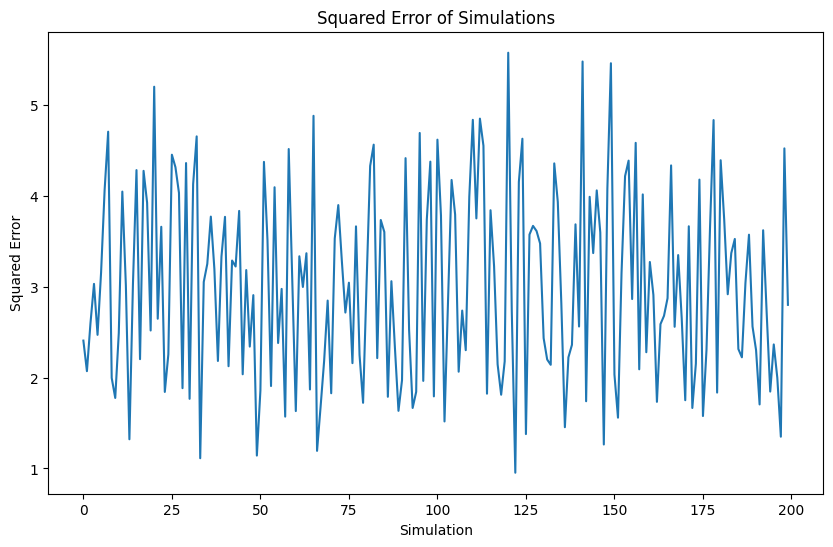

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sqerror)
plt.xlabel('Simulation')
plt.ylabel('Squared Error')
plt.title('Squared Error of Simulations')
plt.show()